<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data(y_hat)_add_delta_(0_8)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_0.8'

In [4]:
os.listdir(base_path)

['data_add_delta_0.8_n20.csv',
 'data_add_delta_0.8_n60.csv',
 'data_add_delta_0.8_n30.csv',
 'data_add_delta_0.8_n120.csv',
 'data_add_delta_0.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.8_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,88.221093,51.573504,24.326753,7.075314,181.196664,174.626806,6.569858
1,0.0,1.0,72.154036,85.693612,99.552111,4.108938,271.508697,266.598371,4.910326
2,0.0,2.0,43.592791,68.471220,81.442624,-2.079963,201.426672,202.636110,-1.209438
3,0.0,3.0,95.893327,64.466250,45.616289,-11.853943,204.121923,216.257703,-12.135780
4,0.0,4.0,28.433556,25.734638,28.179286,2.445549,94.793029,92.204290,2.588739
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,35.596755,75.127184,36.185592,5.289682,162.199213,157.472511,4.726702
119996,999.0,116.0,25.425058,78.410020,58.789735,-4.056361,168.568451,172.418812,-3.850361
119997,999.0,117.0,23.406825,53.225433,49.195339,-6.898820,128.928777,136.050294,-7.121517
119998,999.0,118.0,35.251557,90.571752,56.442834,-0.733031,191.533113,192.125312,-0.592199


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,88.221093,51.573504,24.326753,7.075314,181.196664,174.626806,6.569858
1,0.0,1.0,72.154036,85.693612,99.552111,4.108938,271.508697,266.598371,4.910326
2,0.0,2.0,43.592791,68.471220,81.442624,-2.079963,201.426672,202.636110,-1.209438
3,0.0,3.0,95.893327,64.466250,45.616289,-11.853943,204.121923,216.257703,-12.135780
4,0.0,4.0,28.433556,25.734638,28.179286,2.445549,94.793029,92.204290,2.588739
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,35.596755,75.127184,36.185592,5.289682,162.199213,157.472511,4.726702
119996,999.0,116.0,25.425058,78.410020,58.789735,-4.056361,168.568451,172.418812,-3.850361
119997,999.0,117.0,23.406825,53.225433,49.195339,-6.898820,128.928777,136.050294,-7.121517
119998,999.0,118.0,35.251557,90.571752,56.442834,-0.733031,191.533113,192.125312,-0.592199


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    88.221093  51.573504  24.326753   7.075314  181.196664   
      1.0    72.154036  85.693612  99.552111   4.108938  271.508697   
      2.0    43.592791  68.471220  81.442624  -2.079963  201.426672   
      3.0    95.893327  64.466250  45.616289 -11.853943  204.121923   
      4.0    28.433556  25.734638  28.179286   2.445549   94.793029   
...                ...        ...        ...        ...         ...   
999.0 115.0  35.596755  75.127184  36.185592   5.289682  162.199213   
      116.0  25.425058  78.410020  58.789735  -4.056361  168.568451   
      117.0  23.406825  53.225433  49.195339  -6.898820  128.928777   
      118.0  35.251557  90.571752  56.442834  -0.733031  191.533113   
      119.0  61.562496  85.266019  38.231856  -0.423577  194.636794   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    174.626806   6.569858  
      1.0    266.598371   4.910326  
      2.0    202.636110  -1.209438  
      3.0    216.257703 -12.135780  
      4.0     92.204290   2.588739  
...                 ...        ...  
999.0 115.0  157.472511   4.726702  
      116.0  172.418812  -3.850361  
      117.0  136.050294  -7.121517  
      118.0  192.125312  -0.592199  
      119.0  195.685751  -1.048957  

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    88.221093  51.573504  24.326753   7.075314  181.196664   
      1.0    72.154036  85.693612  99.552111   4.108938  271.508697   
      2.0    43.592791  68.471220  81.442624  -2.079963  201.426672   
      3.0    95.893327  64.466250  45.616289 -11.853943  204.121923   
      4.0    28.433556  25.734638  28.179286   2.445549   94.793029   
...                ...        ...        ...        ...         ...   
999.0 115.0  35.596755  75.127184  36.185592   5.289682  162.199213   
      116.0  25.425058  78.410020  58.789735  -4.056361  168.568451   
      117.0  23.406825  53.225433  49.195339  -6.898820  128.928777   
      118.0  35.251557  90.571752  56.442834  -0.733031  191.533113   
      119.0  61.562496  85.266019  38.231856  -0.423577  194.636794   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    174.626806   6.569858  
      1.0    266.598371   4.910326  
      2.0    202.636110  -1.209438  
      3.0    216.257703 -12.135780  
      4.0     92.204290   2.588739  
...                 ...        ...  
999.0 115.0  157.472511   4.726702  
      116.0  172.418812  -3.850361  
      117.0  136.050294  -7.121517  
      118.0  192.125312  -0.592199  
      119.0  195.685751  -1.048957  

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,88.221093,51.573504,24.326753,7.075314,181.196664,174.626806,6.569858
1,0.0,1.0,72.154036,85.693612,99.552111,4.108938,271.508697,266.598371,4.910326
2,0.0,2.0,43.592791,68.471220,81.442624,-2.079963,201.426672,202.636110,-1.209438
3,0.0,3.0,95.893327,64.466250,45.616289,-11.853943,204.121923,216.257703,-12.135780
4,0.0,4.0,28.433556,25.734638,28.179286,2.445549,94.793029,92.204290,2.588739
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,35.596755,75.127184,36.185592,5.289682,162.199213,157.472511,4.726702
119996,999.0,116.0,25.425058,78.410020,58.789735,-4.056361,168.568451,172.418812,-3.850361
119997,999.0,117.0,23.406825,53.225433,49.195339,-6.898820,128.928777,136.050294,-7.121517
119998,999.0,118.0,35.251557,90.571752,56.442834,-0.733031,191.533113,192.125312,-0.592199


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    88.221093  51.573504  24.326753   7.075314  181.196664   
      1.0    72.154036  85.693612  99.552111   4.108938  271.508697   
      2.0    43.592791  68.471220  81.442624  -2.079963  201.426672   
      3.0    95.893327  64.466250  45.616289 -11.853943  204.121923   
      4.0    28.433556  25.734638  28.179286   2.445549   94.793029   
...                ...        ...        ...        ...         ...   
999.0 115.0  35.596755  75.127184  36.185592   5.289682  162.199213   
      116.0  25.425058  78.410020  58.789735  -4.056361  168.568451   
      117.0  23.406825  53.225433  49.195339  -6.898820  128.928777   
      118.0  35.251557  90.571752  56.442834  -0.733031  191.533113   
      119.0  61.562496  85.266019  38.231856  -0.423577  194.636794   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    174.626806   6.569858  
      1.0    266.598371   4.910326  
      2.0    202.636110  -1.209438  
      3.0    216.257703 -12.135780  
      4.0     92.204290   2.588739  
...                 ...        ...  
999.0 115.0  157.472511   4.726702  
      116.0  172.418812  -3.850361  
      117.0  136.050294  -7.121517  
      118.0  192.125312  -0.592199  
      119.0  195.685751  -1.048957  

[120000 rows x 7 columns]

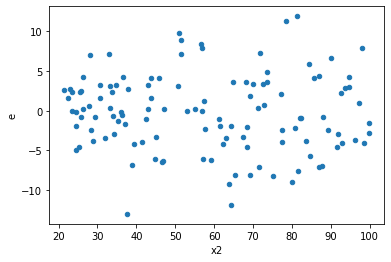

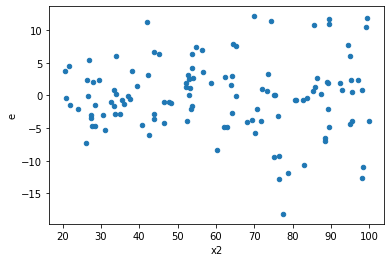

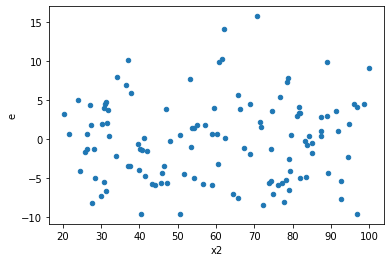

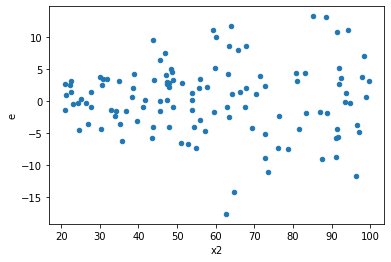

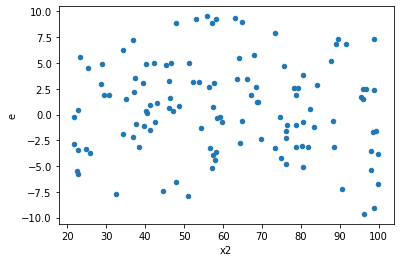

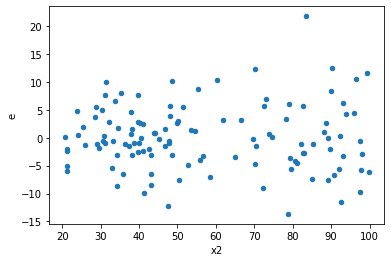

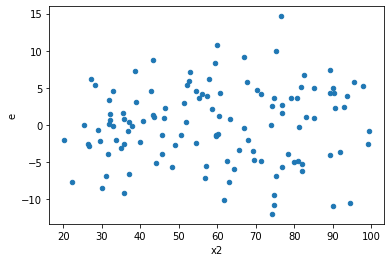

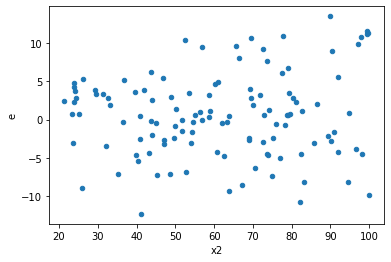

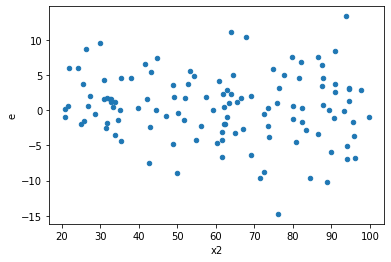

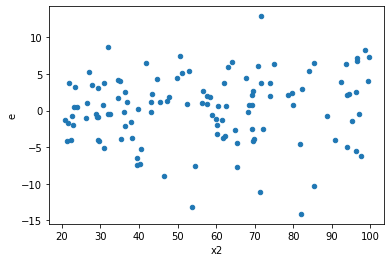

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)

    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,45.0,45.0,841.5767665056292,990.8916795759019,18.701705922347315,22.01981510168671,1.1774228080110314,0.5861088920791415,0.7069455539604292,0.29305444603957076,Reject005=1 : Homoscedasticity
1.0,45.0,45.0,705.2425411401578,1573.5464995455482,15.672056469781284,34.96769998990107,2.231213246157291,0.008231396672617963,0.995884301663691,0.004115698336308982,Reject005=0 : Heteroscedasticity
2.0,45.0,45.0,1004.3581162177853,1436.380484233753,22.31906924928412,31.91956631630562,1.430147734199509,0.23395471725892492,0.8830226413705375,0.11697735862946246,Reject005=1 : Homoscedasticity
3.0,45.0,45.0,679.9412873087779,1847.8234018180597,15.109806384639509,41.06274226262355,2.717622001058039,0.001078167790071971,0.999460916104964,0.0005390838950359855,Reject005=0 : Heteroscedasticity
5.0,45.0,45.0,1206.1772933044717,1956.116309262353,26.803939851210483,43.46925131694118,1.6217485771957545,0.1084868737978193,0.9457565631010904,0.05424343689890965,Reject005=1 : Homoscedasticity
6.0,45.0,45.0,959.1517697662471,1470.5836011920896,21.31448377258327,32.67963558204644,1.533212623431308,0.15556484804465898,0.9222175759776705,0.07778242402232949,Reject005=1 : Homoscedasticity
7.0,45.0,45.0,1403.1845697027368,1430.1148520232719,31.181879326727483,31.780330044961598,1.019192259451827,0.9494406968851044,0.5252796515574478,0.4747203484425522,Reject005=1 : Homoscedasticity
8.0,45.0,45.0,874.1832150436142,1144.961743667288,19.42629366763587,25.44359430371751,1.3097503177410748,0.36881601371567996,0.81559199314216,0.18440800685783998,Reject005=1 : Homoscedasticity
9.0,45.0,45.0,684.6836206607719,949.9545577997665,15.215191570239377,21.110101284439256,1.3874357865943805,0.275788487195872,0.862105756402064,0.137894243597936,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,841.5767665056292,990.8916795759019,18.701705922347315,22.01981510168671,1.1774228080110314,0.5861088920791415,Reject005=1 : Homoscedasticity
1.0,45.0,45.0,705.2425411401578,1573.5464995455482,15.672056469781284,34.96769998990107,2.231213246157291,0.008231396672617963,Reject005=0 : Heteroscedasticity
2.0,45.0,45.0,1004.3581162177853,1436.380484233753,22.31906924928412,31.91956631630562,1.430147734199509,0.23395471725892492,Reject005=1 : Homoscedasticity
3.0,45.0,45.0,679.9412873087779,1847.8234018180597,15.109806384639509,41.06274226262355,2.717622001058039,0.001078167790071971,Reject005=0 : Heteroscedasticity
4.0,45.0,45.0,821.4937070157081,813.4552503353766,18.25541571146018,18.076783340786147,0.9902148286570164,0.9738346220002727,Reject005=1 : Homoscedasticity
5.0,45.0,45.0,1206.1772933044717,1956.116309262353,26.803939851210483,43.46925131694118,1.6217485771957545,0.1084868737978193,Reject005=1 : Homoscedasticity
6.0,45.0,45.0,959.1517697662471,1470.5836011920896,21.31448377258327,32.67963558204644,1.533212623431308,0.15556484804465898,Reject005=1 : Homoscedasticity
7.0,45.0,45.0,1403.1845697027368,1430.1148520232719,31.181879326727483,31.780330044961598,1.019192259451827,0.9494406968851044,Reject005=1 : Homoscedasticity
8.0,45.0,45.0,874.1832150436142,1144.961743667288,19.42629366763587,25.44359430371751,1.3097503177410748,0.36881601371567996,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      765
Reject005=0 : Heteroscedasticity    235
Name: Result_test, dtype: int64